___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [43]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

#### *ii. Load Dataset*

In [44]:
df = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [45]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [47]:
df.nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [49]:
df.shape

(250000, 55)

In [50]:
df.iloc[:,[1,2,3,4,5,6,7,8,9,10, 54]].corr()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Cover_Type
Aspect,1.000000,0.037395,0.039839,0.054886,0.042044,-0.603792,0.321651,0.639158,-0.072858,-0.147731,0.005389
Slope,0.037395,1.000000,-0.063237,0.263713,-0.279899,-0.198674,-0.611509,-0.326459,-0.246624,-0.159234,0.075304
Horizontal_Distance_To_Hydrology,0.039839,-0.063237,1.000000,0.649110,0.198532,-0.026739,0.085746,0.079973,0.150115,-0.008892,0.009305
Vertical_Distance_To_Hydrology,0.054886,0.263713,0.649110,1.000000,0.000320,-0.092033,-0.132788,-0.038035,-0.026351,-0.118925,0.082886
Horizontal_Distance_To_Roadways,0.042044,-0.279899,0.198532,0.000320,1.000000,0.014715,0.240571,0.160647,0.481598,0.381750,-0.108043
Hillshade_9am,-0.603792,-0.198674,-0.026739,-0.092033,0.014715,1.000000,-0.015798,-0.781836,0.094567,0.181507,-0.017806
Hillshade_Noon,0.321651,-0.611509,0.085746,-0.132788,0.240571,-0.015798,1.000000,0.613879,0.124245,-0.001506,-0.106578
Hillshade_3pm,0.639158,-0.326459,0.079973,-0.038035,0.160647,-0.781836,0.613879,1.000000,0.033912,-0.116650,-0.055023
Horizontal_Distance_To_Fire_Points,-0.072858,-0.246624,0.150115,-0.026351,0.481598,0.094567,0.124245,0.033912,1.000000,0.430310,-0.088740
Wilderness_Area_1,-0.147731,-0.159234,-0.008892,-0.118925,0.381750,0.181507,-0.001506,-0.116650,0.430310,1.000000,-0.234256


***
***

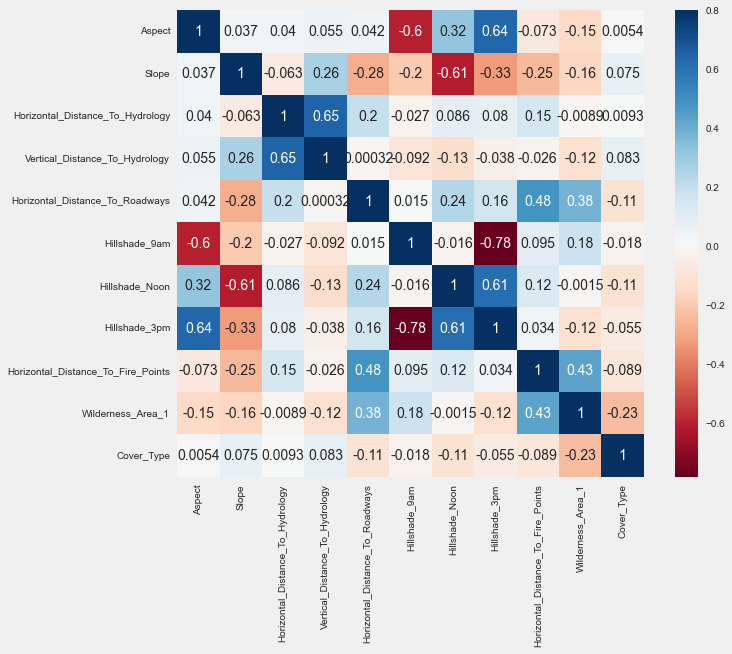

In [51]:
# numeric continous columns corr.
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.iloc[:,[1,2,3,4,5,6,7,8,9,10, 54]].corr(),vmax=0.8,square=True, annot=True, cmap=plt.cm.RdBu, linecolor='white');

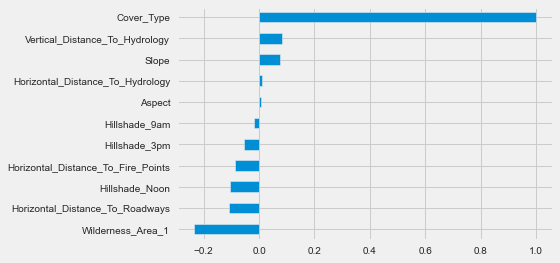

In [52]:
df.iloc[:,[1,2,3,4,5,6,7,8,9,10, 54]].corr()["Cover_Type"].sort_values().plot.barh();

In [53]:
df['Cover_Type'].value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

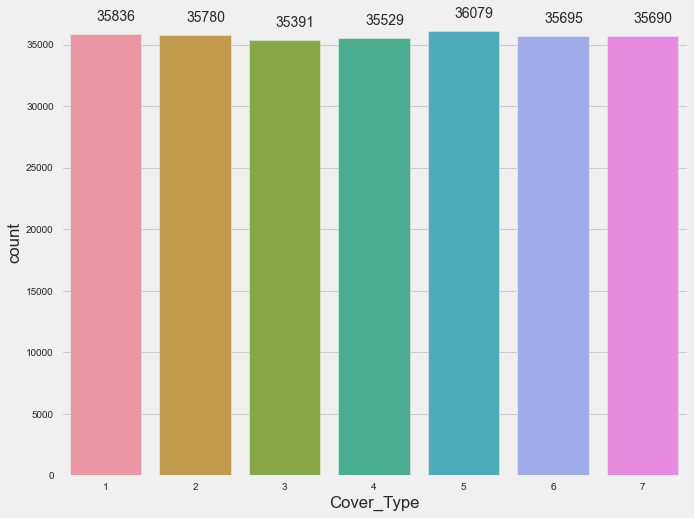

In [54]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df.Cover_Type)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));
    
# Target sütunumuz olan cover_type verilerinin balance bir şekilde dağıldığını görüyoruz.

In [55]:
class_dist=df.groupby('Cover_Type').size()


In [56]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
14.33 %
Cover_Type 2
14.31 %
Cover_Type 3
14.16 %
Cover_Type 4
14.21 %
Cover_Type 5
14.43 %
Cover_Type 6
14.28 %
Cover_Type 7
14.28 %


## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [57]:
df.isnull().sum().any()

False

In [58]:
df.duplicated().value_counts() 

# 2521 adet duplicated satır var.

False    247479
True       2521
dtype: int64

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

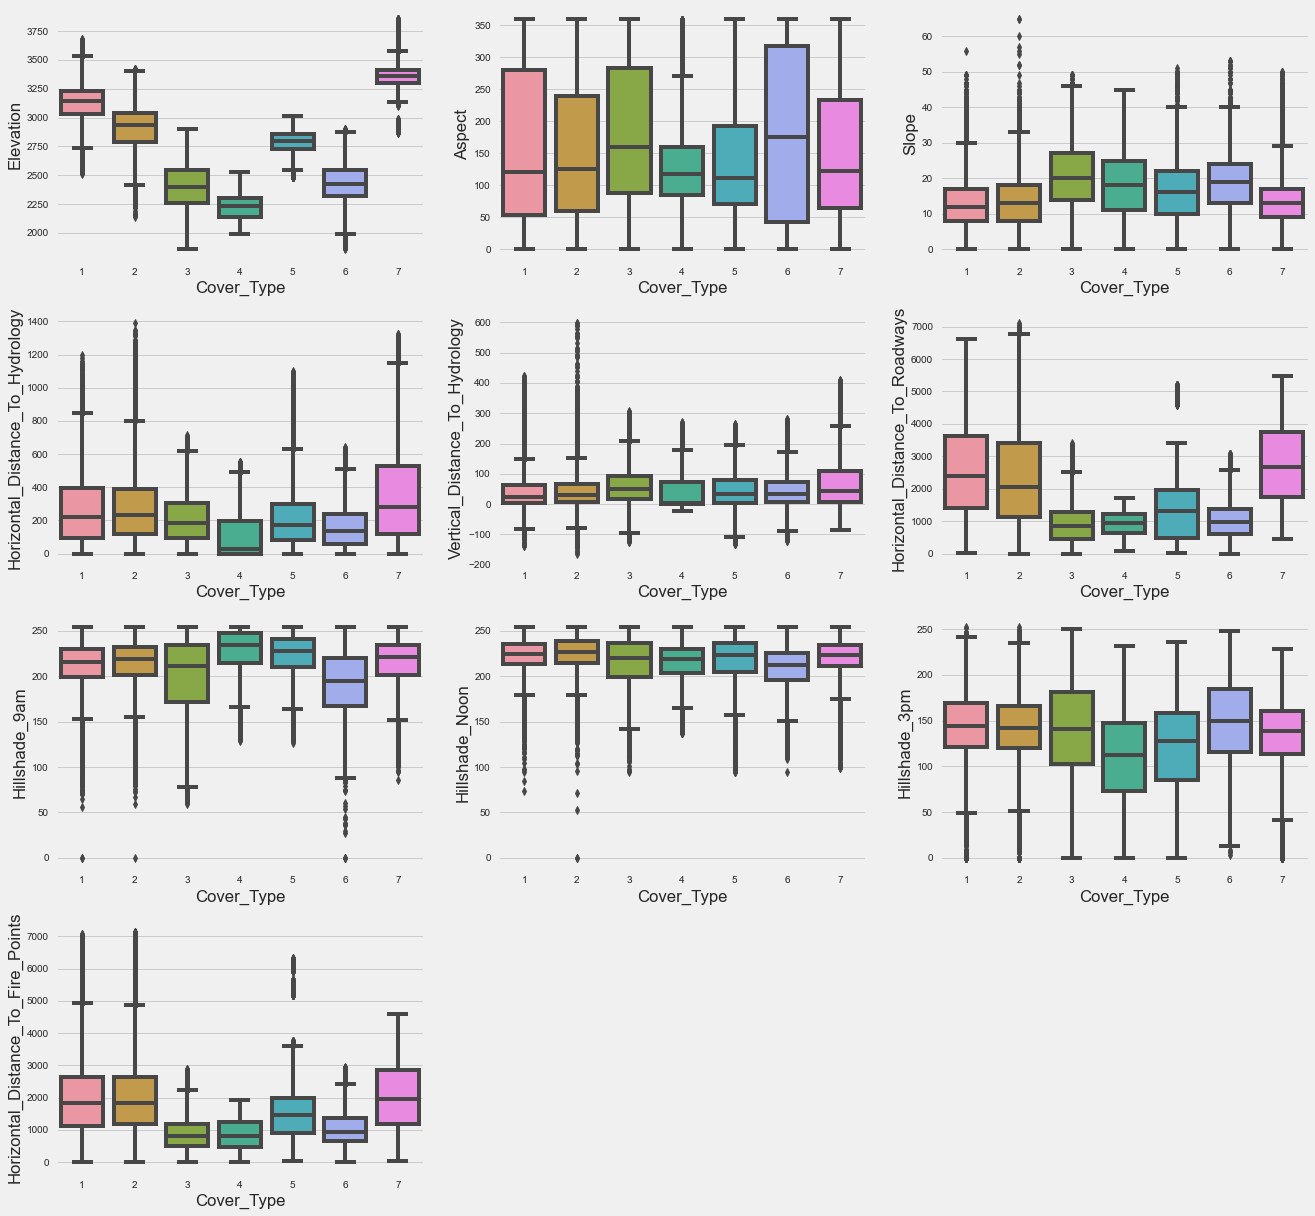

In [59]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = df , whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [60]:
def outlier_function(df, col_name):
   
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [61]:
for column in  df.iloc[:,:10]:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 3 outliers in Slope
There are 732 outliers in Horizontal_Distance_To_Hydrology
There are 957 outliers in Vertical_Distance_To_Hydrology
There are 17 outliers in Horizontal_Distance_To_Roadways
There are 78 outliers in Hillshade_9am
There are 194 outliers in Hillshade_Noon
There are 2394 outliers in Horizontal_Distance_To_Fire_Points


In [62]:
def remove_outlier(df_in, col_name,):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high),col_name]= np.nan

In [63]:
 for column in  df.iloc[:,:10]:
    if outlier_function(df, column)[2] > 0:
       remove_outlier(df, column) 

In [64]:
for column in  df.iloc[:,:10]:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

In [65]:
df.iloc[:,:10].isnull().sum()

Elevation                                0
Aspect                                   0
Slope                                    3
Horizontal_Distance_To_Hydrology       732
Vertical_Distance_To_Hydrology         957
Horizontal_Distance_To_Roadways         17
Hillshade_9am                           78
Hillshade_Noon                         194
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    2394
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
df.shape

(245816, 55)

## Now, let's take a closer look at correlation of continuous columns.

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [68]:
df['Hypotenuse_Horizantal_Vertical'] = (df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)**0.5

In [69]:
df["Average_Hydrology_Roadways"]=(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])/2

In [70]:
df['Average_Elevation_Vertical_Distance_Hydrology'] = (df['Elevation'] + df['Vertical_Distance_To_Hydrology'])/2

In [71]:
df.drop(["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"], axis=1, inplace=True)

In [72]:
df.shape

(245816, 54)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [73]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier




# Evaluation & CV Libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score, plot_precision_recall_curve,auc, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [74]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [76]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [77]:
operations_lsvc = [("scaler", MinMaxScaler()), ("LSVC", LinearSVC(random_state=101))]
pipe_LSVC_model = Pipeline(steps=operations_lsvc)

In [78]:
pipe_LSVC_model.fit(X_train, y_train)

eval_metric(pipe_LSVC_model, X_train, y_train, X_test, y_test)

Test_Set
[[4459 1115    7    0  451   78  919]
 [1699 3251  155    7 1354  322   57]
 [   0   20 3565 1019  444 2014    0]
 [   0    0  322 6491    0  293    0]
 [ 282 1001  570    0 4860  365    0]
 [  13  252 1178  836  799 4054    0]
 [ 700   23   22    0   43    0 6124]]
              precision    recall  f1-score   support

           1       0.62      0.63      0.63      7029
           2       0.57      0.47      0.52      6845
           3       0.61      0.50      0.55      7062
           4       0.78      0.91      0.84      7106
           5       0.61      0.69      0.65      7078
           6       0.57      0.57      0.57      7132
           7       0.86      0.89      0.87      6912

    accuracy                           0.67     49164
   macro avg       0.66      0.67      0.66     49164
weighted avg       0.66      0.67      0.66     49164


Train_Set
[[17846  4403    27     0  1881   272  3687]
 [ 6890 13016   651    19  5259  1316   227]
 [    0   102 14410  4047 

In [79]:
from sklearn.metrics import make_scorer
scoring = {"f1" : make_scorer(f1_score, average = 'micro'),
           "precision" : make_scorer(precision_score, average = 'micro'),
           "recall" : make_scorer(recall_score, average = 'micro')}

#### Cross Validate 

In [80]:
operations = [("scaler", MinMaxScaler()), ("LSVC", LinearSVC(random_state=101))]
model_LSVC = Pipeline(steps=operations)

scores = cross_validate(model_LSVC, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1           0.667153
test_precision    0.667153
test_recall       0.667153
dtype: float64

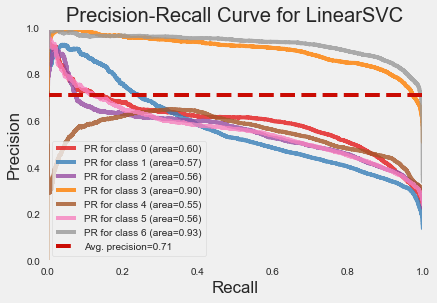

In [81]:
from yellowbrick.classifier import PrecisionRecallCurve
operations_lsvc = [("scaler", MinMaxScaler()), ("lsvc", LinearSVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_lsvc)

viz = PrecisionRecallCurve(
    model,
    per_class=True ,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

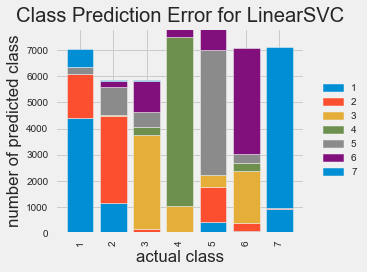

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [88]:
from yellowbrick.classifier import ClassPredictionError

operations_lsvc = [("scaler", MinMaxScaler()), ("lsvc", LinearSVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_lsvc)

visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

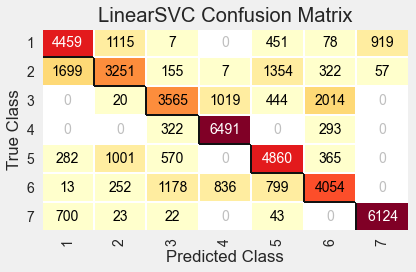

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [87]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(pipe_LSVC_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [85]:
y_pred = pipe_LSVC_model.predict(X_test)

lsvc_f1 = f1_score(y_test, y_pred, average= 'micro')
lsvc_accuracy =accuracy_score(y_test, y_pred)

In [86]:
f1_score(y_test, y_pred, average= 'micro')

0.6672361890814417

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [89]:
DT_model = DecisionTreeClassifier(random_state=101)

In [90]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [91]:
y_pred = DT_model.predict(X_test)

In [92]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[5942  883    5    0   44    6  149]
 [ 910 5562   98    0  162   84   29]
 [   2   77 6559   67   23  334    0]
 [   0    1   47 7040    0   18    0]
 [  17  103    7    0 6934   15    2]
 [   5   44  301   32   19 6731    0]
 [  97   11    0    0    0    0 6804]]
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      7029
           2       0.83      0.81      0.82      6845
           3       0.93      0.93      0.93      7062
           4       0.99      0.99      0.99      7106
           5       0.97      0.98      0.97      7078
           6       0.94      0.94      0.94      7132
           7       0.97      0.98      0.98      6912

    accuracy                           0.93     49164
   macro avg       0.93      0.93      0.93     49164
weighted avg       0.93      0.93      0.93     49164


Train_Set
[[28116     0     0     0     0     0     0]
 [    0 27378     0     0     0     0     0]
 [    0     0 28247     0 

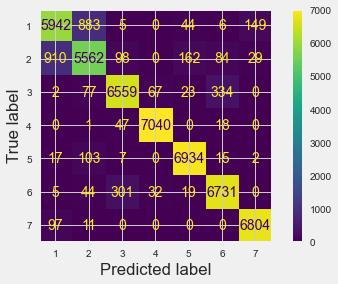

In [93]:
plot_confusion_matrix(DT_model,X_test,y_test)

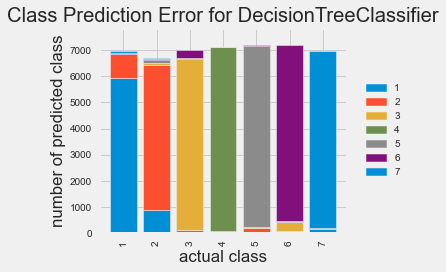

In [94]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

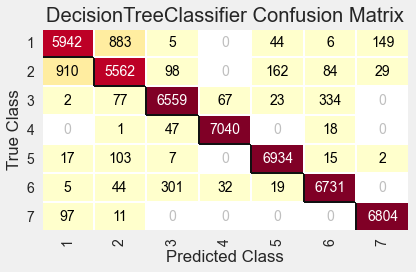

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [95]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(DT_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

#### Cross Validate

In [96]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = scoring, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1           0.922609
test_precision    0.922609
test_recall       0.922609
dtype: float64

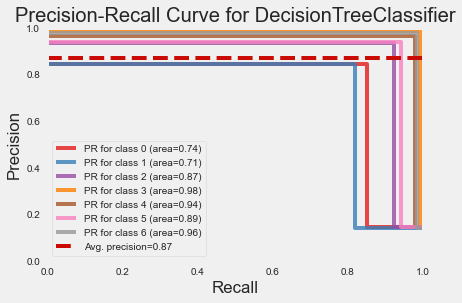

In [97]:
from yellowbrick.classifier import PrecisionRecallCurve

model = DecisionTreeClassifier(random_state=101)

viz = PrecisionRecallCurve(
    model,
    per_class=True ,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [99]:
y_pred = DT_model.predict(X_test)

dt_f1 = f1_score(y_test, y_pred, average= 'micro')
dt_accuracy = accuracy_score(y_test, y_pred)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [100]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[6336  554    3    0   29    9   98]
 [ 565 5953   90    1  139   86   11]
 [   0   14 6735   67   14  232    0]
 [   0    0    9 7096    0    1    0]
 [   3   13   16    0 7045    1    0]
 [   0    6  106   29    6 6985    0]
 [  18    5    0    0    2    0 6887]]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      7029
           2       0.91      0.87      0.89      6845
           3       0.97      0.95      0.96      7062
           4       0.99      1.00      0.99      7106
           5       0.97      1.00      0.98      7078
           6       0.96      0.98      0.97      7132
           7       0.98      1.00      0.99      6912

    accuracy                           0.96     49164
   macro avg       0.96      0.96      0.96     49164
weighted avg       0.96      0.96      0.96     49164


Train_Set
[[28116     0     0     0     0     0     0]
 [    0 27377     0     0     1     0     0]
 [    0     0 28247     0 

In [101]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1           0.953959
test_precision    0.953959
test_recall       0.953959
dtype: float64

### GridSearch

In [102]:
param_grid = {'n_estimators':[64,128,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             scoring="f1_micro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [64, 128, 200]},
             scoring='f1_micro')

In [103]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 128}

In [104]:
rf_grid_model.best_score_

0.9090932117312704

In [106]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[5865  801    6    0  132   13  212]
 [ 853 5226  142    2  436  156   30]
 [   0    8 6146  184   96  628    0]
 [   0    0   42 7051    0   13    0]
 [   0   58   44    0 6954   22    0]
 [   0   16  209   70   47 6790    0]
 [  57    4    0    0    4    0 6847]]
              precision    recall  f1-score   support

           1       0.87      0.83      0.85      7029
           2       0.85      0.76      0.81      6845
           3       0.93      0.87      0.90      7062
           4       0.96      0.99      0.98      7106
           5       0.91      0.98      0.94      7078
           6       0.89      0.95      0.92      7132
           7       0.97      0.99      0.98      6912

    accuracy                           0.91     49164
   macro avg       0.91      0.91      0.91     49164
weighted avg       0.91      0.91      0.91     49164


Train_Set
[[25038  1973     9     0   466    46   584]
 [ 1820 23358   436     0  1252   434    78]
 [    0    14 25810   482 

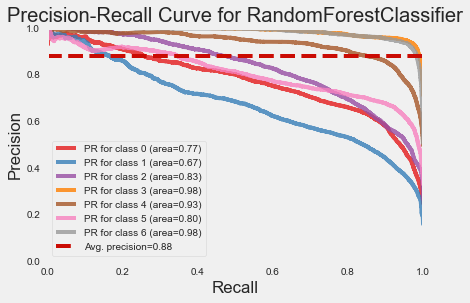

In [108]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [109]:
y_pred = rf_grid_model.predict(X_test)

rf_f1 = f1_score(y_test, y_pred, average= 'micro')
rf_accuracy = accuracy_score(y_test, y_pred)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [110]:
xgb_model = XGBClassifier(random_state=101)

In [112]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.99918704, 0.99226981, 0.9846878 , ..., 0.99455315, 0.98839471,
       0.99918704])

In [113]:
xgb_model.fit(X_train,y_train, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [115]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[4628  829    5    0  451   32 1084]
 [1641 3072  118    3 1551  294  166]
 [   0   13 4388  612  237 1812    0]
 [   0    0  261 6777    0   68    0]
 [  75  341  187    0 6246  228    1]
 [   1    8 1444  338  182 5159    0]
 [ 351   13    0    0    7    0 6541]]
              precision    recall  f1-score   support

           1       0.69      0.66      0.67      7029
           2       0.72      0.45      0.55      6845
           3       0.69      0.62      0.65      7062
           4       0.88      0.95      0.91      7106
           5       0.72      0.88      0.79      7078
           6       0.68      0.72      0.70      7132
           7       0.84      0.95      0.89      6912

    accuracy                           0.75     49164
   macro avg       0.74      0.75      0.74     49164
weighted avg       0.74      0.75      0.74     49164


Train_Set
[[18689  3223    21     0  1830   140  4213]
 [ 6603 12512   517     8  6026  1152   560]
 [    0    34 17764  2503 

In [116]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1           0.749319
test_precision    0.749319
test_recall       0.749319
dtype: float64

### XGBoost Model GridsearchCV

In [117]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [120]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring= "f1_micro", 
                              n_jobs = -1).fit(X_train, y_train,sample_weight=classes_weights)

In [121]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [122]:
xgb_grid_model.best_score_

0.769465867097586

In [123]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[4784  972    5    0  357   24  887]
 [1516 3543  152    3 1257  267  107]
 [   0   18 4702  511  219 1612    0]
 [   0    0  197 6839    0   70    0]
 [  18  431  211    0 6166  250    2]
 [   0   34 1457  234  218 5189    0]
 [ 338    6    0    0    5    0 6563]]
              precision    recall  f1-score   support

           1       0.72      0.68      0.70      7029
           2       0.71      0.52      0.60      6845
           3       0.70      0.67      0.68      7062
           4       0.90      0.96      0.93      7106
           5       0.75      0.87      0.81      7078
           6       0.70      0.73      0.71      7132
           7       0.87      0.95      0.91      6912

    accuracy                           0.77     49164
   macro avg       0.76      0.77      0.76     49164
weighted avg       0.76      0.77      0.76     49164


Train_Set
[[19180  3899    20     0  1428   123  3466]
 [ 6044 14492   602     3  4728  1111   398]
 [    0    61 18979  2037 

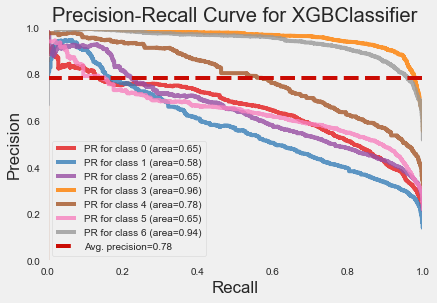

In [125]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [132]:
y_pred = xgb_grid_model.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred, average= 'micro')
xgb_accuracy = accuracy_score(y_test, y_pred)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [133]:
compare = pd.DataFrame({"Model": ["LSVC", "Decision Tree" ,"Random Forest", "XGBoost"],
                        "F1": [ lsvc_f1, dt_f1,rf_f1, xgb_f1 ],
                        "Accuracy": [ lsvc_accuracy, dt_accuracy , rf_accuracy, xgb_accuracy]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    


# Accuracy Comparison

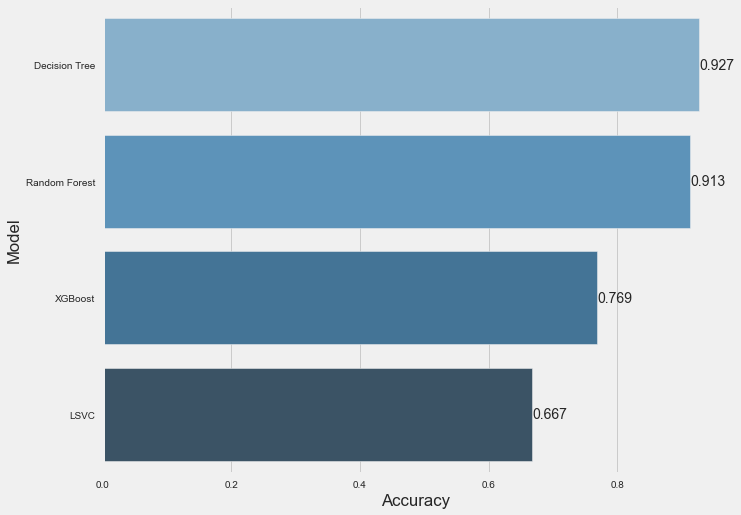

In [138]:
plt.figure(figsize=(10,8))

compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.show()


# F1 Score Comparison

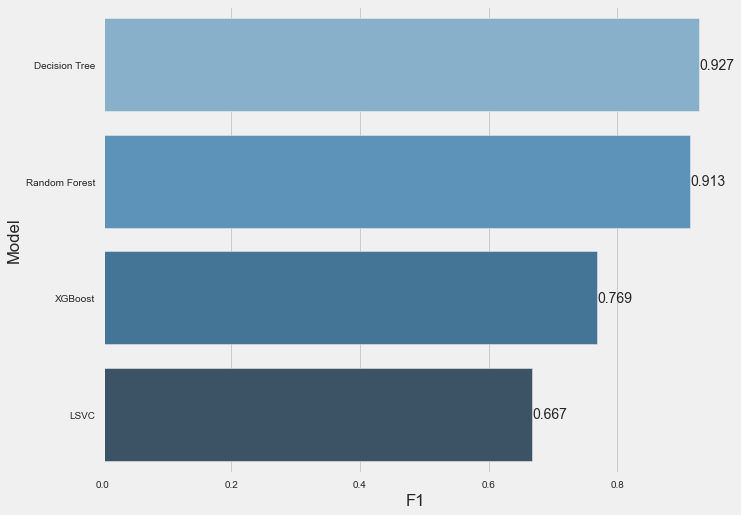

In [139]:
plt.figure(figsize=(10,8))
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___